# Problem formulation

The problem we focused on is predicting the global temperature anomaly based on concentration of gases in the atmosphere. Data is collected from year 2001 to 2022. 
<br> <br> The result of our research can show directly how the global warming is going to change in the future years. This information can be useful for preparing society for the impact of temperature changes. It can also show how our population influence global weather changes because of gases emission.<br> <br>
Data used in our project come from two different sources. Data about global temperature anomaly comes from NASA Global Climate Change https://climate.nasa.gov/vital-signs/global-temperature/ and the gases concentration comes from Global Monitoring Laboratory https://gml.noaa.gov/. The first one contains yearly temperature anomaly around the globe. Original data was from years 1880-2023. The second data set has information about three gases concentration in the atmosphere. It not only has yearly data but also monthly.
<br> <br>
Before starting the project we created the dag graph that shows what data impacts global warming. 
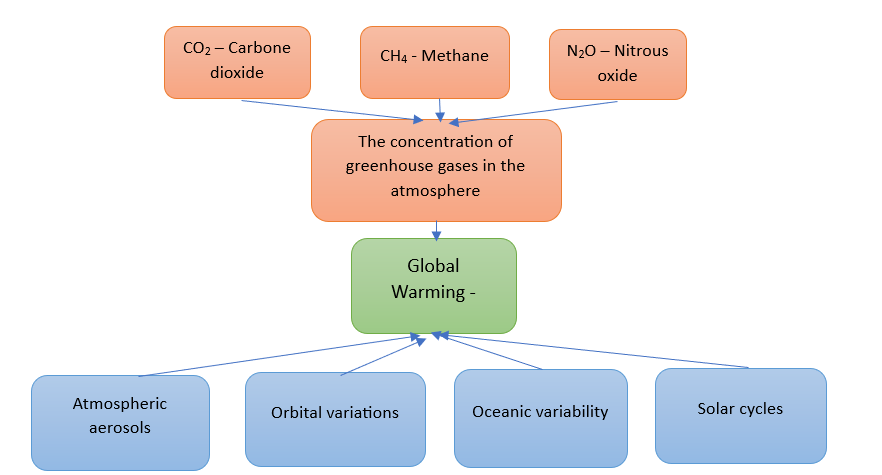. <br> The parameter we have taken into consideration is carbon dioxide(CO2). Although there were more factors than only gases the one we have chosen had the most significant impact on temperature changes. <br><br>
During the given period of time there was a globla pandemic of COVID-19. Because of that the emission of gases were much lower due to for example smaller amount of flights. This may be potentially confounding for our results. 


# Data preprocessing

As the data were clear we didn't change much while cleaning it. We had to compute the mean value for every year when it comes to gases because the data had values for every month which we didn't need to use. These actions were taken in different file "data_preprocessing.ipnyb". 

### Imports

In [269]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from cmdstanpy import CmdStanModel
from sklearn.preprocessing import StandardScaler
import arviz as az

df = pd.read_csv("root/data/data_preprocessed/data.csv", index_col=0)
df.head()

,year,CO2,CH4,N2O,Temperature
0,2001,371.319167,1771.269167,316.364167,0.54
1,2002,373.452500,1772.731667,316.942500,0.63
2,2003,375.983333,1777.334167,317.631667,0.62
3,2004,377.698333,1776.995833,318.262500,0.53
4,2005,379.983333,1774.180000,318.920000,0.68


### Data standarization

Data was standarized using MinMax scaler. We wanted to have our parameters in the similar range and in not so big scale as they were before. The standard score of a sample x is calculated as follows in code:

In [270]:
# min-max scaling
min_co2 = np.min(df['CO2'])
max_co2 = np.max(df['CO2'])
min_ch4 = np.min(df['CH4'])
max_ch4 = np.max(df['CH4'])
min_n2o = np.min(df['N2O'])
max_n2o = np.max(df['N2O'])

df['CO2'] = (df['CO2'] - min_co2) / (max_co2 - min_co2)
df['CH4'] = (df['CH4'] - min_ch4) / (max_ch4 - min_ch4)
df['N2O'] = (df['N2O'] - min_n2o) / (max_n2o - min_n2o)

df

,year,CO2,CH4,N2O,Temperature
0,2001,0.000000,0.000000,0.000000,0.54
1,2002,0.045155,0.010395,0.029968,0.63
2,2003,0.098723,0.043106,0.065679,0.62
3,2004,0.135023,0.040701,0.098368,0.53
4,2005,0.183388,0.020688,0.132438,0.68
5,2006,0.227996,0.026303,0.179247,0.64
6,2007,0.268935,0.072519,0.211849,0.67
7,2008,0.307175,0.112427,0.266474,0.54
8,2009,0.345504,0.158524,0.306633,0.66
9,2010,0.397555,0.196767,0.354089,0.73


Text(0.5, 1.0, 'Temperature during the years')

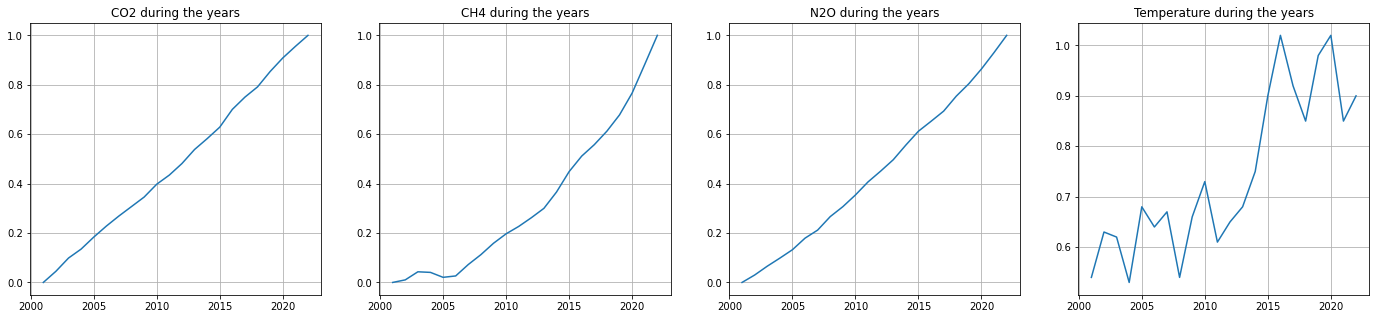

In [271]:
fig, axs = plt.subplots(1,4, figsize=(24,5))
axs[0].plot(df['year'],df['CO2'])
axs[0].grid()
axs[0].set_title("CO2 during the years")
axs[0].axis
axs[1].plot(df['year'],df['CH4'])
axs[1].grid()
axs[1].set_title("CH4 during the years")
axs[2].plot(df['year'],df['N2O'])
axs[2].grid()
axs[2].set_title("N2O during the years")
axs[3].plot(df['year'],df['Temperature'])
axs[3].grid()
axs[3].set_title("Temperature during the years")

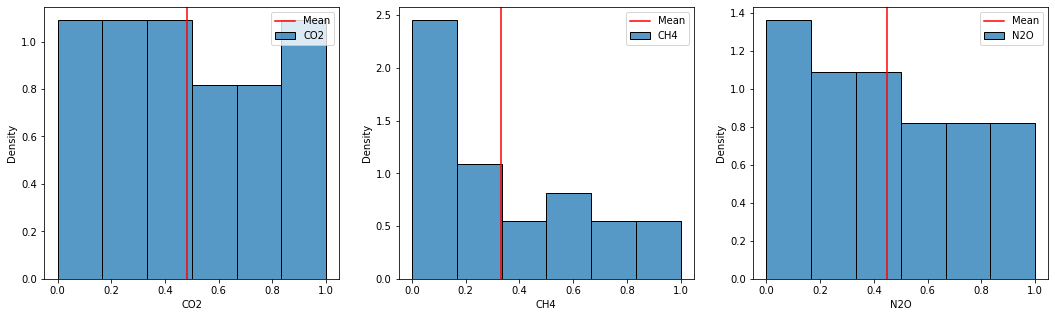

In [272]:

fig, axs = plt.subplots(1,3, figsize=(18,5))
graph = sns.histplot(data=df, x='CO2', label='CO2', ax=axs[0], stat='density')
graph.axvline(df.CO2.mean(), color='red', label='Mean')
graph.legend()

graph = sns.histplot(data=df, x='CH4', label='CH4', ax=axs[1], stat='density')
graph.axvline(df.CH4.mean(), label='Mean', color='red')
graph.legend()

graph = sns.histplot(data=df, x='N2O', label='N2O', ax=axs[2], stat='density')
graph.axvline(df.N2O.mean(), label='Mean', color='red')
graph.legend()
plt.show()

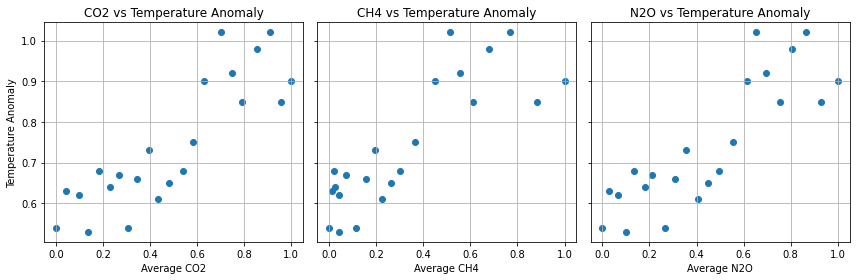

In [275]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(12, 4))

axs[0].scatter(df['CO2'], df['Temperature'])
axs[0].set_xlabel('Average CO2')
axs[0].set_ylabel('Temperature Anomaly')
axs[0].set_title('CO2 vs Temperature Anomaly')
axs[0].grid()

axs[1].scatter(df['CH4'], df['Temperature'])
axs[1].set_xlabel('Average CH4')
axs[1].set_title('CH4 vs Temperature Anomaly')
axs[1].grid()

axs[2].scatter(df['N2O'], df['Temperature'])
axs[2].set_xlabel('Average N2O')
axs[2].set_title('N2O vs Temperature Anomaly')
axs[2].grid()

plt.tight_layout()
plt.show()

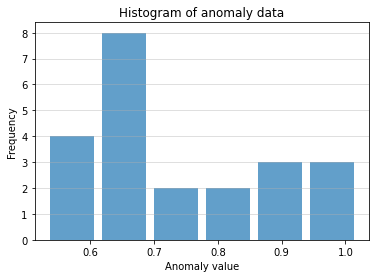

In [273]:
plt.hist(np.array(df['Temperature']), bins='auto', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Anomaly value')
plt.ylabel('Frequency')
plt.title('Histogram of anomaly data')
plt.show()

From histogram above we can see that the data doesn't have strong resemblance for any of distributions. We decided to go with  Normal Distribution and Log-normal Distribution. Below are shown plots of a few distributions. We plotted them to see which distribution is the most similar to ours histogram

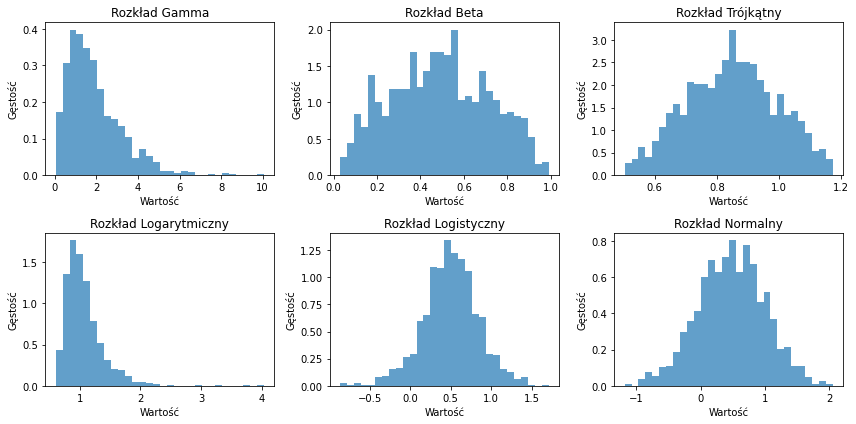

In [443]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, beta, triang, lognorm, logistic,norm


gamma_values = gamma.rvs(a=2, size=1000)
beta_values = beta.rvs(a=2, b=2, size=1000)
triang_values = triang.rvs(c=0.5, loc=0.5, scale=0.7, size=1000)
lognorm_values = lognorm.rvs(s=0.5, loc=0.5, scale=0.5, size=1000)
logistic_values = logistic.rvs(loc=0.5, scale=0.2, size=1000)
normal_values = norm.rvs(0.5,0.5, size =1000)

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.hist(gamma_values, bins=30, density=True, alpha=0.7)
plt.title("Rozkład Gamma")
plt.xlabel("Wartość")
plt.ylabel("Gęstość")

plt.subplot(2, 3, 2)
plt.hist(beta_values, bins=30, density=True, alpha=0.7)
plt.title("Rozkład Beta")
plt.xlabel("Wartość")
plt.ylabel("Gęstość")

plt.subplot(2, 3, 3)
plt.hist(triang_values, bins=30, density=True, alpha=0.7)
plt.title("Rozkład Trójkątny")
plt.xlabel("Wartość")
plt.ylabel("Gęstość")

plt.subplot(2, 3, 4)
plt.hist(lognorm_values, bins=30, density=True, alpha=0.7)
plt.title("Rozkład Logarytmiczny")
plt.xlabel("Wartość")
plt.ylabel("Gęstość")

plt.subplot(2, 3, 5)
plt.hist(logistic_values, bins=30, density=True, alpha=0.7)
plt.title("Rozkład Logistyczny")
plt.xlabel("Wartość")
plt.ylabel("Gęstość")

plt.subplot(2, 3, 6)
plt.hist(normal_values, bins=30, density=True, alpha=0.7)
plt.title("Rozkład Normalny")
plt.xlabel("Wartość")
plt.ylabel("Gęstość")

plt.tight_layout()
plt.show()


_________________________________________________________

# Model 1 - Normal Distribution

Our first approach was to create model with Normal Distribution. It is characterized by its symmetric bell shaped curve. It is defined by two parameters: mean and standard deviation. It is symmetric around mean value so it represents center of distribution while the standard deviation determines the spread of the data. <br> <br> 
Below plots shows that correlation between our parameters and temperature data can be considered to be linear and that is why we have chosen this approach in the model. <br> <br> Standard Bayesian model: $outcome_{i}$ ~ Normal($\mu_{i}$, $\sigma$)
    $\mu_{i}$ = $\alpha$+ $\beta$ * $predictor_{i}$
    $\alpha$ ~ Normal(a,b)
    $\beta$ ~ Normal(c,d)
    $\sigma$ ~ Normal(f,g)

The sum of multiplications beta and predictors is added two more times to the equation for every single predictor. $\alpha$ is usually the mean value of the data and $\sigma$  parameter is standard deviation.

## Prior

In [476]:
%%writefile root/stan_files/temp1_ppc.stan
data {
  int<lower=0> N;
  vector[N] CO2;
}

generated quantities {
  real alpha = normal_rng(0.5, 0.1);
  real beta_CO2 = beta_rng(2,2);
  real sigma = normal_rng(0.05, 0.01);
  vector[N] temperature;
  array[N] real mu;

  for (i in 1:N) {
    mu[i] = alpha + beta_CO2 * CO2[i];
    temperature[i] = normal_rng(mu[i], sigma);
  }
}

Overwriting root/stan_files/temp1_ppc.stan


In [477]:
data_sim={'N':len(df), 'CO2':np.linspace(df.CO2.min(),df.CO2.max(),len(df))}
model_ppc1=CmdStanModel(stan_file='root/stan_files/temp1_ppc.stan')
R = 1000
sim1=model_ppc1.sample(data=data_sim,
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:compiling stan file /root/stan_files/temp1_ppc.stan to exe file /root/stan_files/temp1_ppc
INFO:cmdstanpy:compiled model executable: /root/stan_files/temp1_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [478]:
ppc_df = sim1.draws_pd()
ppc_df.head()

,lp__,accept_stat__,alpha,beta_CO2,sigma,temperature[1],temperature[2],temperature[3],temperature[4],temperature[5],...,mu[13],mu[14],mu[15],mu[16],mu[17],mu[18],mu[19],mu[20],mu[21],mu[22]
0,0.0,0.0,0.770817,0.320404,0.051276,0.699573,0.798697,0.862798,0.932746,0.881627,...,0.953905,0.969163,0.984420,0.999677,1.014930,1.030190,1.045450,1.060710,1.075960,1.09122
1,0.0,0.0,0.509829,0.968773,0.061808,0.500993,0.546073,0.641575,0.674788,0.518957,...,1.063410,1.109550,1.155680,1.201810,1.247940,1.294070,1.340210,1.386340,1.432470,1.47860
2,0.0,0.0,0.528530,0.607168,0.038011,0.528272,0.557302,0.632533,0.644140,0.672297,...,0.875483,0.904396,0.933308,0.962221,0.991134,1.020050,1.048960,1.077870,1.106780,1.13570
3,0.0,0.0,0.676019,0.559450,0.062191,0.582499,0.579885,0.728274,0.828287,0.796570,...,0.995705,1.022350,1.048990,1.075630,1.102270,1.128910,1.155550,1.182190,1.208830,1.23547
4,0.0,0.0,0.433039,0.494101,0.047802,0.461655,0.445899,0.430364,0.443830,0.560794,...,0.715382,0.738911,0.762439,0.785968,0.809497,0.833025,0.856554,0.880083,0.903611,0.92714


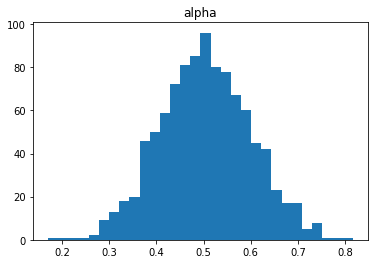

In [479]:
plt.hist(ppc_df['alpha'], bins=30)
plt.title('alpha')
plt.show()

Alpha represents mean value of our temperature data and is generated as we wanted it to be

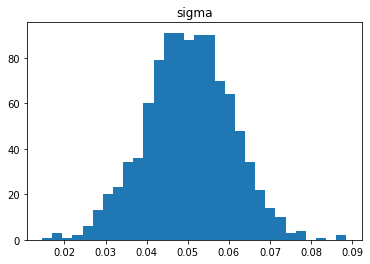

In [480]:
plt.hist(ppc_df['sigma'], bins=30)
plt.title('sigma')
plt.show()

Sigma as standard deviation is not so large because we want to stay with the results in the range 0.5-1

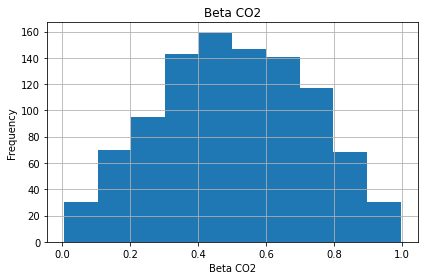

In [481]:
fig, axs = plt.subplots(1, 1, sharey=True, figsize=(6, 4))

axs.hist(ppc_df['beta_CO2'])
axs.set_xlabel('Beta CO2')
axs.set_ylabel('Frequency')
axs.set_title('Beta CO2')
axs.grid()

plt.tight_layout()
plt.show()

As Co2 strongly corresponds with our result we assumed that beta parameter must be positive so that beta doesnt get smaller

Text(80, 20, 'min')

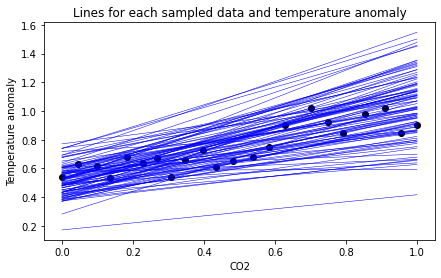

In [482]:
fig, axes = plt.subplots(1,1,figsize=(7,4))

beta_humid = sim1.stan_variable('beta_CO2')
alpha_humid = sim1.stan_variable('alpha')
for i in range(100):
    axes.plot(df['CO2'], alpha_humid[i]+beta_humid[i]*np.array(df['CO2']), linewidth = 0.5, color='b')
plt.title("Lines for each sampled data and temperature anomaly")
axes.scatter(df['CO2'], df['Temperature'], color= 'black')
axes.set_xlabel('CO2')
axes.set_ylabel('Temperature anomaly')
axes.annotate(text='max',xy=(80,320), weight = 'bold', color = 'r', fontsize = 15)
axes.annotate(text='min',xy=(80,20), weight = 'bold', color = 'r', fontsize = 15)


Here we can see that lines which are generated from prior are directed properly and go up as dots(original data) goes up.

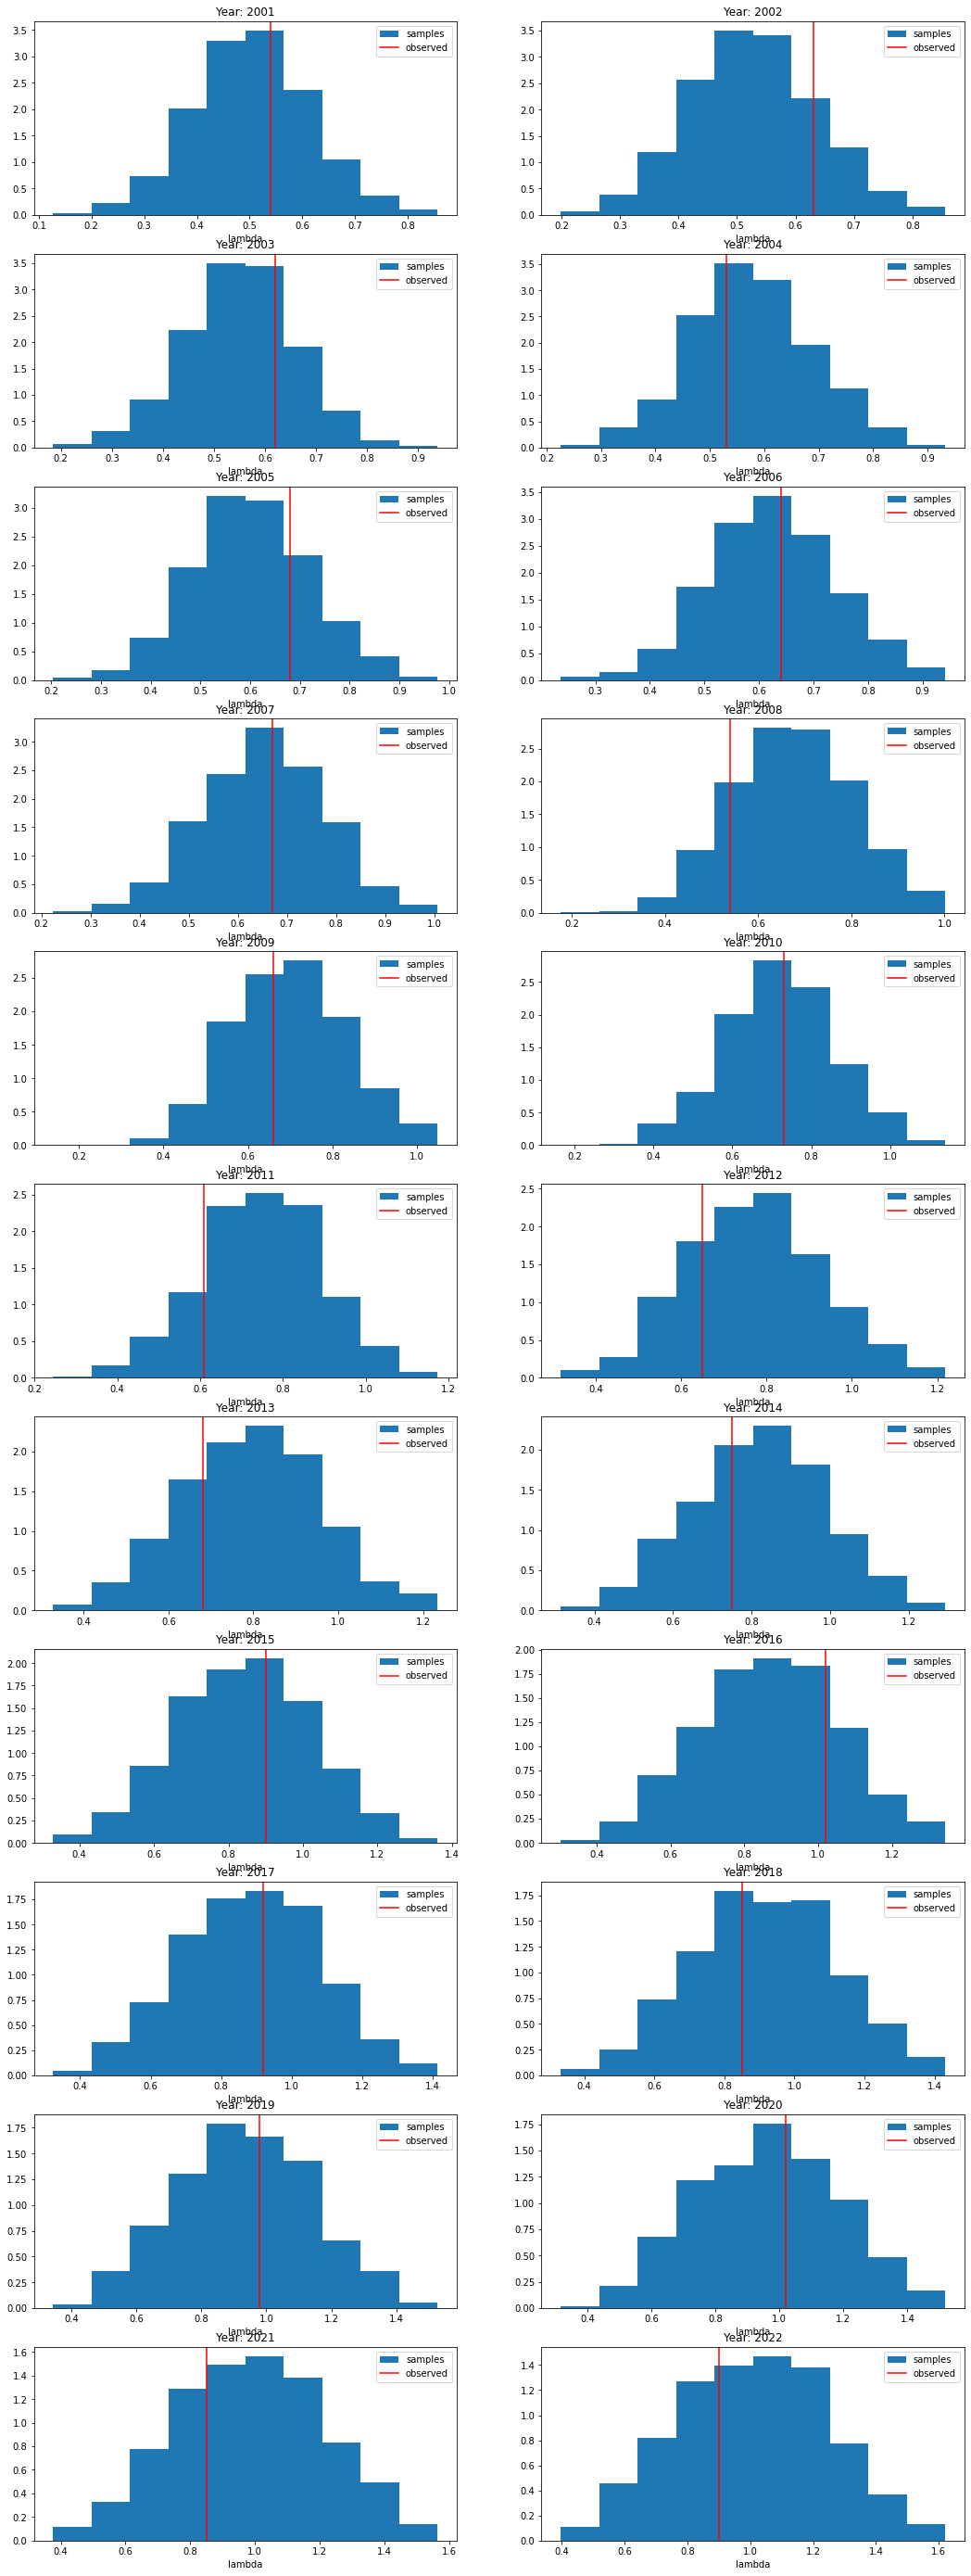

In [483]:
fig, axes = plt.subplots(int(len(df)/2), 2, figsize=(18, 50))
axes = axes.flatten()
df_fit = sim1.draws_pd()
sampled_lambdas = df_fit.loc[:, "temperature[1]":"temperature[22]"]
observed_lambda = df['Temperature'].values
for i, ax in enumerate(axes):
    ax.hist(sampled_lambdas[f'temperature[{i + 1}]'].values, density=True, label='samples')
    ax.axvline(x=observed_lambda[i], color='r', label='observed')
    ax.set_xlabel('lambda')
    ax.set_title(f'Year: {df["year"][i]}')
    ax.legend()

The output for every year looks okay. There are some outliers but in general mean value is consisted with histogram. 

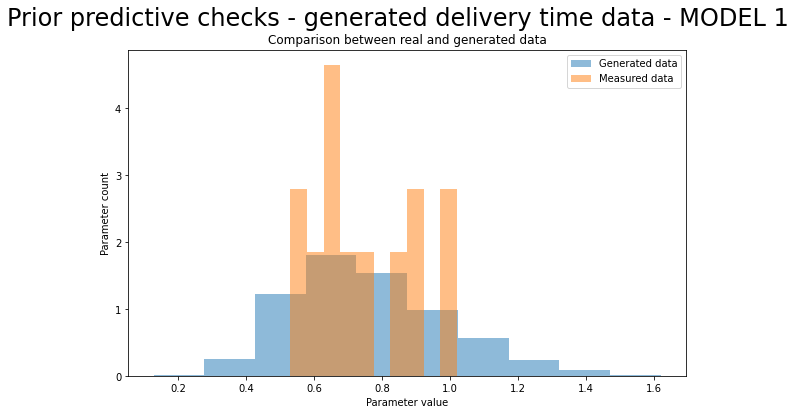

In [484]:
fig2, ax2= plt.subplots(1,1, figsize=(10,6))
fig2.suptitle("Prior predictive checks - generated delivery time data - MODEL 1", fontsize=24)

# get measurements
model1_ppc_measurements = sim1.stan_variable('temperature').flatten()  # flatten makes it row/column vector (one of these)

# plot measurements
ax2.hist(model1_ppc_measurements, density=True,  alpha=0.5, label="Generated data")

# compare with real data, density set to True because each data point sampled 999 times
ax2.hist(df["Temperature"], density=True,  alpha=0.5, label="Measured data")
ax2.legend()
ax2.set_xlabel("Parameter value")
ax2.set_ylabel("Parameter count")
ax2.set_title("Comparison between real and generated data")
plt.show()

Histogram from generated data is not so high because it has more values at its ends. it couldn't be done better with this distribution but maybe posterior will give better results.

## Posterior

In [485]:
%%writefile root/stan_files/temp2_ppc.stan

data {
    int<lower=0> N;
    vector[N] temp;
    vector[N] CO2;
    vector[N] CH4;
    vector[N] N2O;
}

parameters {
    real<lower=0> alpha;
    real<lower=0> sigma;
    real<lower=0> beta_CO2;
}

transformed parameters {
    vector[N] mean;
    for (i in 1:N) {
        mean[i] = alpha + beta_CO2 * CO2[i];
    }
}

model {
    alpha ~ normal(0.5, 0.1);
    sigma ~ normal(0.05, 0.01);
    beta_CO2 ~ beta(2, 2);
    for (i in 1:N) {
        temp[i] ~ normal(mean[i], sigma);
    }
}

generated quantities {
    vector[N] temp_;
    vector[N] log_lik;
    for (i in 1:N) {
        temp_[i] = normal_rng(mean[i], sigma);
        log_lik[i] = normal_lpdf(temp_[i]|mean[i], sigma);
    }
}

Overwriting root/stan_files/temp2_ppc.stan


In [486]:
model_1_fit=CmdStanModel(stan_file='root/stan_files/temp2_ppc.stan')
N = len(df)
data_fit = {'N': N, 'CO2': df.CO2.values[:N], 'temp': df.Temperature.values[:N], 'CH4': df.CH4.values[:N], 'N2O': df.N2O.values[:N]}
fit1=model_1_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:compiling stan file /root/stan_files/temp2_ppc.stan to exe file /root/stan_files/temp2_ppc
INFO:cmdstanpy:compiled model executable: /root/stan_files/temp2_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [487]:
df_ = fit1.draws_pd()
df_.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,sigma,beta_CO2,...,log_lik[13],log_lik[14],log_lik[15],log_lik[16],log_lik[17],log_lik[18],log_lik[19],log_lik[20],log_lik[21],log_lik[22]
0,36.7531,0.975742,0.458758,2.0,7.0,0.0,-36.1738,0.532570,0.063717,0.427514,...,1.83399,-0.783393,1.598340,1.82237,0.946823,1.30827,1.729100,0.725926,0.413414,1.70604
1,35.4760,0.772759,0.458758,2.0,7.0,0.0,-34.6763,0.515846,0.065909,0.423595,...,1.41664,1.760420,0.093719,1.78333,1.638350,1.79674,1.781090,1.589510,0.445635,1.78821
2,35.5661,1.000000,0.458758,2.0,7.0,0.0,-34.5696,0.556908,0.062353,0.427346,...,-0.59363,-1.430400,1.476590,1.15956,1.826120,1.78909,0.235449,1.809020,1.711180,1.70280
3,34.9533,0.985062,0.458758,2.0,7.0,0.0,-34.0220,0.517288,0.058399,0.431627,...,1.37568,1.719260,1.317810,0.76981,1.818400,1.54796,1.538410,1.413260,1.717110,1.52197
4,34.5661,0.919770,0.458758,2.0,7.0,0.0,-29.7397,0.530669,0.080415,0.457595,...,1.56150,-0.398904,1.503940,1.52875,1.587820,1.23554,-3.478540,1.026190,1.363880,1.08839


Text(80, 20, 'min')

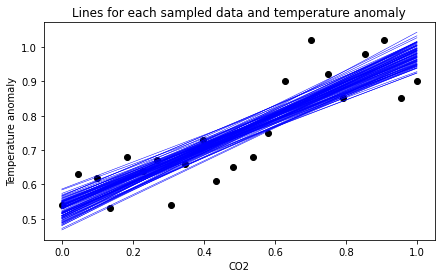

In [488]:
fig, axes = plt.subplots(1,1,figsize=(7,4))

beta_humid = fit1.stan_variable('beta_CO2')
alpha_humid = fit1.stan_variable('alpha')
for i in range(100):
    axes.plot(df['CO2'], alpha_humid[i]+beta_humid[i]*np.array(df['CO2']), linewidth = 0.5, color='b')
plt.title("Lines for each sampled data and temperature anomaly")
axes.scatter(df['CO2'], df['Temperature'], color= 'black')
axes.set_xlabel('CO2')
axes.set_ylabel('Temperature anomaly')
axes.annotate(text='max',xy=(80,320), weight = 'bold', color = 'r', fontsize = 15)
axes.annotate(text='min',xy=(80,20), weight = 'bold', color = 'r', fontsize = 15)

Here lines on the plot go much better and we can see that model is suitable for our data

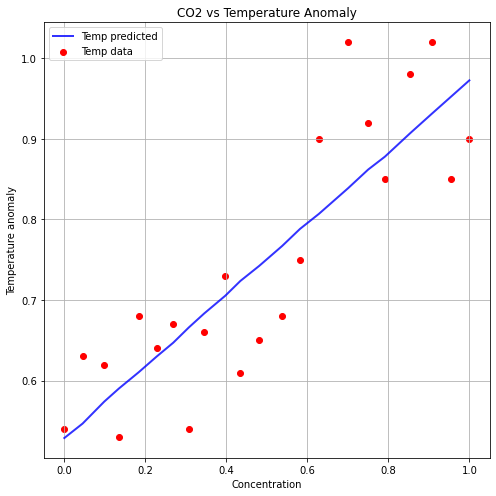

In [490]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

CO2 = np.array(df['CO2'])
CH4 = np.array(df['CH4'])
N2O = np.array(df['N2O'])
Temperature = np.array(df['Temperature'])
mu_CO2 = fit1.stan_variable('mean') 
temp_mean = fit1.stan_variable('temp_') 
column_means = np.mean(temp_mean, axis=0)


mu_CH4 = fit1.stan_variable('mean')
mu_N2O = fit1.stan_variable('mean')

fig, ax = plt.subplots(1, 1, figsize=(7 ,7))


ax.plot(
    CO2,
    column_means,
    color='blue',
    linewidth=2,
    alpha=0.8,
    label='Temp predicted'
)


ax.scatter(CO2, Temperature, color='red', label='Temp data')

ax.set_xlabel('Concentration')
ax.set_ylabel('Temperature anomaly')


ax.legend()
ax.grid()
ax.set_title('CO2 vs Temperature Anomaly')
plt.tight_layout()
plt.show()

The generated data represented as their average were well matched to the temperature anomaly data

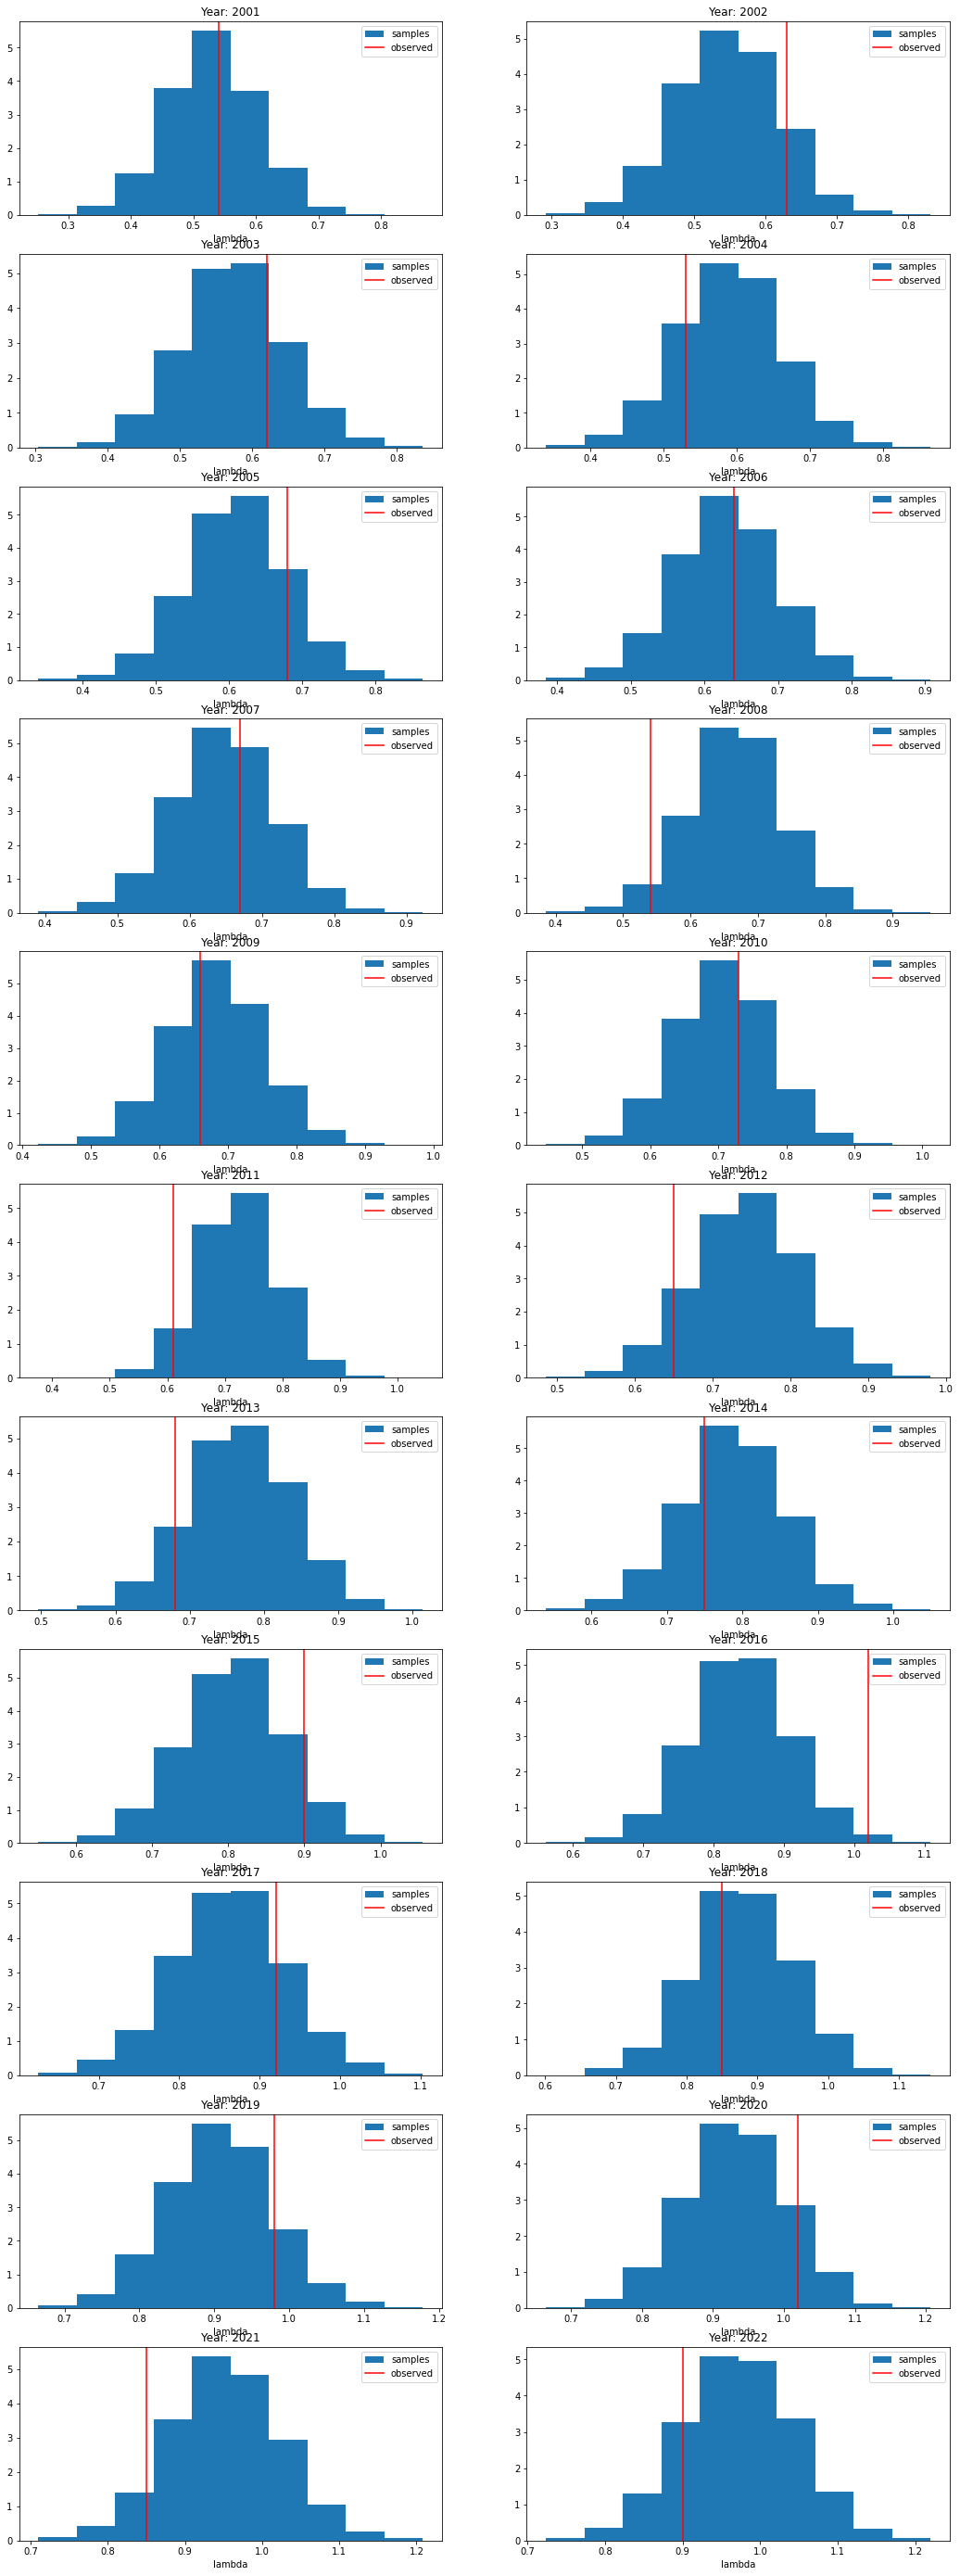

In [491]:
fig, axes = plt.subplots(int(len(df)/2), 2, figsize=(18, 50))
axes = axes.flatten()
df_fit = fit1.draws_pd()
sampled_lambdas = df_fit.loc[:, "temp_[1]":"temp_[22]"]
observed_lambda = df['Temperature'].values
for i, ax in enumerate(axes):
    ax.hist(sampled_lambdas[f'temp_[{i + 1}]'].values, density=True, label='samples')
    ax.axvline(x=observed_lambda[i], color='r', label='observed')
    ax.set_xlabel('lambda')
    ax.set_title(f'Year: {df["year"][i]}')
    ax.legend()

Although results are better then they were in prior on the plot it is not so obvious. The red line which represents mean value of our data is not always at the center of histogram.

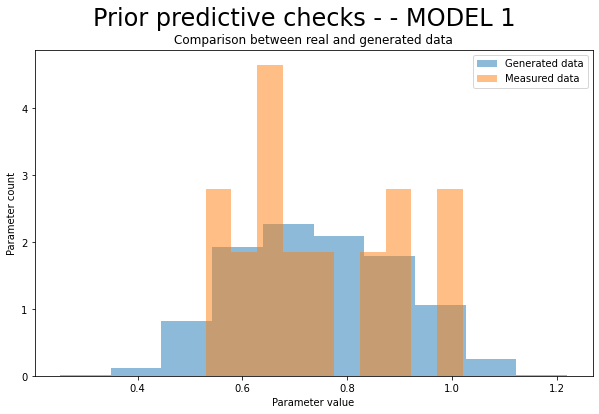

In [493]:
fig2, ax2= plt.subplots(1,1, figsize=(10,6))
fig2.suptitle("Prior predictive checks - - MODEL 1", fontsize=24)

# get measurements
model1_ppc_measurements = fit1.stan_variable('temp_').flatten()  # flatten makes it row/column vector (one of these)

# plot measurements
ax2.hist(model1_ppc_measurements, density=True,  alpha=0.5, label="Generated data")

# compare with real data, density set to True because each data point sampled 999 times
ax2.hist(df["Temperature"], density=True,  alpha=0.5, label="Measured data")
ax2.legend()
ax2.set_xlabel("Parameter value")
ax2.set_ylabel("Parameter count")
ax2.set_title("Comparison between real and generated data")
ax2.axvline(mean_model, color='r', linestyle='--', label='Mean (Generated data)')
ax2.axvline(mean_data, color='g', linestyle='--', label='Mean (Measured data)')
ax2.legend()
plt.show()

There are some picks in th histogram of measured data that are not covered with generated data. In the next model we will focus on making histogram higher from the left side that is why we chose the log-normal distribution

# Model 2 - Lognormal Distribution

The second modeling approach will be to use a log-normal distribution This model is characterized by the fact that the logarithm of the random variable X has a normal distribution. This distribution has a shape similar to the Gaussian distribution, but with some difference that the model takes only positive values and the resulting distribution has a skew shape with a long right tail The log-normal distribution is described by two parameters: the mean (μ) and the standard deviation (σ) like in Gaussian model. For this model we used the linear relation too.

## Prior

Alpha normal distribution is based on the mean value of 'Temperature Anomaly' in the data set and sigma is based on standard deviation of the same data. Beta for every predictor and sigma is also normally distributed. The parameters for distribution of beta where chosen considering the output of this prior model. It was the most difficult challenge to  fit beta parameters properly. 

In [494]:
%%writefile root/stan_files/temp3_ppc.stan
data {
  int<lower=0> N;
  vector[N] CO2;
  vector[N] CH4;
  vector[N] N2O;
}

generated quantities {
  real alpha = normal_rng(0.5, 0.1);
  real beta_CO2 = beta_rng(2,2);
  real sigma = normal_rng(0.1, 0.05);
  vector[N] temperature;
  array[N] real mu;

  for (i in 1:N) {
    mu[i] = log1p(alpha + beta_CO2 * CO2[i])-0.8;
    
    temperature[i] =  lognormal_rng(mu[i], sigma);
  }
}


Overwriting root/stan_files/temp3_ppc.stan


In [495]:
data_sim={'N':len(df), 'CO2':np.linspace(df.CO2.min(),df.CO2.max(),len(df)),'CH4':np.linspace(df.CH4.min(),df.CH4.max(),len(df)),'N2O':np.linspace(df.N2O.min(),df.N2O.max(),len(df))}
model_ppc1=CmdStanModel(stan_file='root/stan_files/temp3_ppc.stan')
R = 1000
sim2=model_ppc1.sample(data=data_sim,
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)


INFO:cmdstanpy:compiling stan file /root/stan_files/temp3_ppc.stan to exe file /root/stan_files/temp3_ppc


INFO:cmdstanpy:compiled model executable: /root/stan_files/temp3_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [496]:
ppc_df = sim2.draws_pd()
ppc_df

,lp__,accept_stat__,alpha,beta_CO2,sigma,temperature[1],temperature[2],temperature[3],temperature[4],temperature[5],...,mu[13],mu[14],mu[15],mu[16],mu[17],mu[18],mu[19],mu[20],mu[21],mu[22]
0,0.0,0.0,0.770817,0.320404,0.106380,0.686352,0.823828,0.919474,1.038670,0.912655,...,-0.130170,-0.122392,-0.114673,-0.107014,-0.099413,-0.091870,-0.084382,-0.076951,-0.069574,-0.062252
1,0.0,0.0,0.509829,0.968773,0.159042,0.663159,0.681574,0.796843,0.792986,0.484796,...,-0.075638,-0.053527,-0.031895,-0.010720,0.010015,0.030329,0.050239,0.069760,0.088907,0.107695
2,0.0,0.0,0.528530,0.607168,0.040054,0.686626,0.699700,0.748338,0.748207,0.760994,...,-0.171134,-0.155835,-0.140767,-0.125923,-0.111296,-0.096879,-0.082668,-0.068656,-0.054837,-0.041207
3,0.0,0.0,0.676019,0.559450,0.160955,0.591190,0.556794,0.774963,0.951461,0.830495,...,-0.109003,-0.095742,-0.082655,-0.069737,-0.056984,-0.044391,-0.031955,-0.019672,-0.007538,0.004451
4,0.0,0.0,0.433039,0.494101,0.089012,0.679148,0.641604,0.606228,0.604434,0.730553,...,-0.260364,-0.246741,-0.233301,-0.220039,-0.206951,-0.194032,-0.181278,-0.168684,-0.156247,-0.143963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.551349,0.792743,0.088400,0.724673,0.668107,0.713349,0.813327,0.794489,...,-0.104683,-0.086024,-0.067707,-0.049719,-0.032050,-0.014687,0.002379,0.019160,0.035663,0.051898
996,0.0,0.0,0.417077,0.117290,0.081727,0.664050,0.623153,0.655039,0.701103,0.614667,...,-0.405191,-0.401435,-0.397692,-0.393964,-0.390250,-0.386549,-0.382862,-0.379188,-0.375528,-0.371882
997,0.0,0.0,0.430334,0.504969,0.131991,0.789991,0.702014,0.757055,0.571716,0.806586,...,-0.258322,-0.244430,-0.230728,-0.217211,-0.203874,-0.190713,-0.177723,-0.164900,-0.152239,-0.139736
998,0.0,0.0,0.552493,0.619401,0.089281,0.623077,0.811913,0.714462,0.755754,0.804467,...,-0.154764,-0.139411,-0.124290,-0.109395,-0.094718,-0.080253,-0.065994,-0.051937,-0.038074,-0.024400


Text(80, 20, 'min')

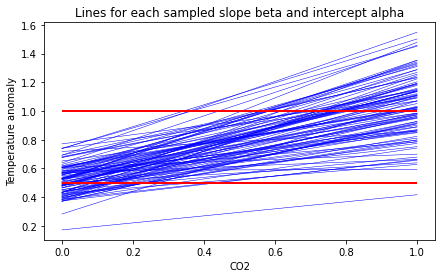

In [498]:
fig, axes = plt.subplots(1,1,figsize=(7,4))

beta_humid = sim2.stan_variable('beta_CO2')
alpha_humid = sim2.stan_variable('alpha')
for i in range(100):
    axes.plot(df['CO2'], alpha_humid[i]+beta_humid[i]*np.array(df['CO2']), linewidth = 0.5, color='b')
plt.title("Lines for each sampled slope beta and intercept alpha")
axes.set_xlabel('CO2')
axes.set_ylabel('Temperature anomaly')
axes.hlines([0.5, 1],xmin = df['CO2'].min(), xmax = df['CO2'].max(), linestyles = '-',linewidth = 2, color = 'r')
axes.annotate(text='max',xy=(80,320), weight = 'bold', color = 'r', fontsize = 15)
axes.annotate(text='min',xy=(80,20), weight = 'bold', color = 'r', fontsize = 15)

This model fits  fine. Those lines that are under or above min and max values on the plot are acceptable because temperature anomaly can go below 0.5 (even below 0) and above 1. After fitting the data to the model everything should be between those lines perfectly. 

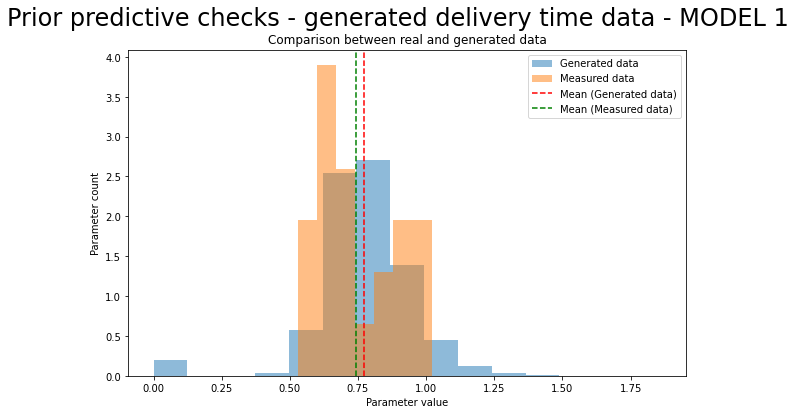

In [510]:

fig2, ax2= plt.subplots(1,1, figsize=(10,6))
fig2.suptitle("Prior predictive checks - generated delivery time data - MODEL 1", fontsize=24)

# get measurements
model1_ppc_measurements = sim2.stan_variable('temperature').flatten()  # flatten makes it row/column vector (one of these)
mean_model = np.mean(model1_ppc_measurements)
mean_data = np.mean(df["Temperature"])
# plot measurements
ax2.hist(model1_ppc_measurements, density=True,bins= 15,  alpha=0.5, label="Generated data")

# compare with real data, density set to True because each data point sampled 999 times
ax2.hist(df["Temperature"], density=True, bins=7, alpha=0.5, label="Measured data")

ax2.set_xlabel("Parameter value")
ax2.set_ylabel("Parameter count")
ax2.set_title("Comparison between real and generated data")
mean_model = np.mean(model1_ppc_measurements)
mean_data = np.mean(df["Temperature"])
ax2.axvline(mean_model, color='r', linestyle='--', label='Mean (Generated data)')
ax2.axvline(mean_data, color='g', linestyle='--', label='Mean (Measured data)')
ax2.legend()
plt.show()

Data from prior here corresponds much better with actual data. the histogram is higher and not so wide. 

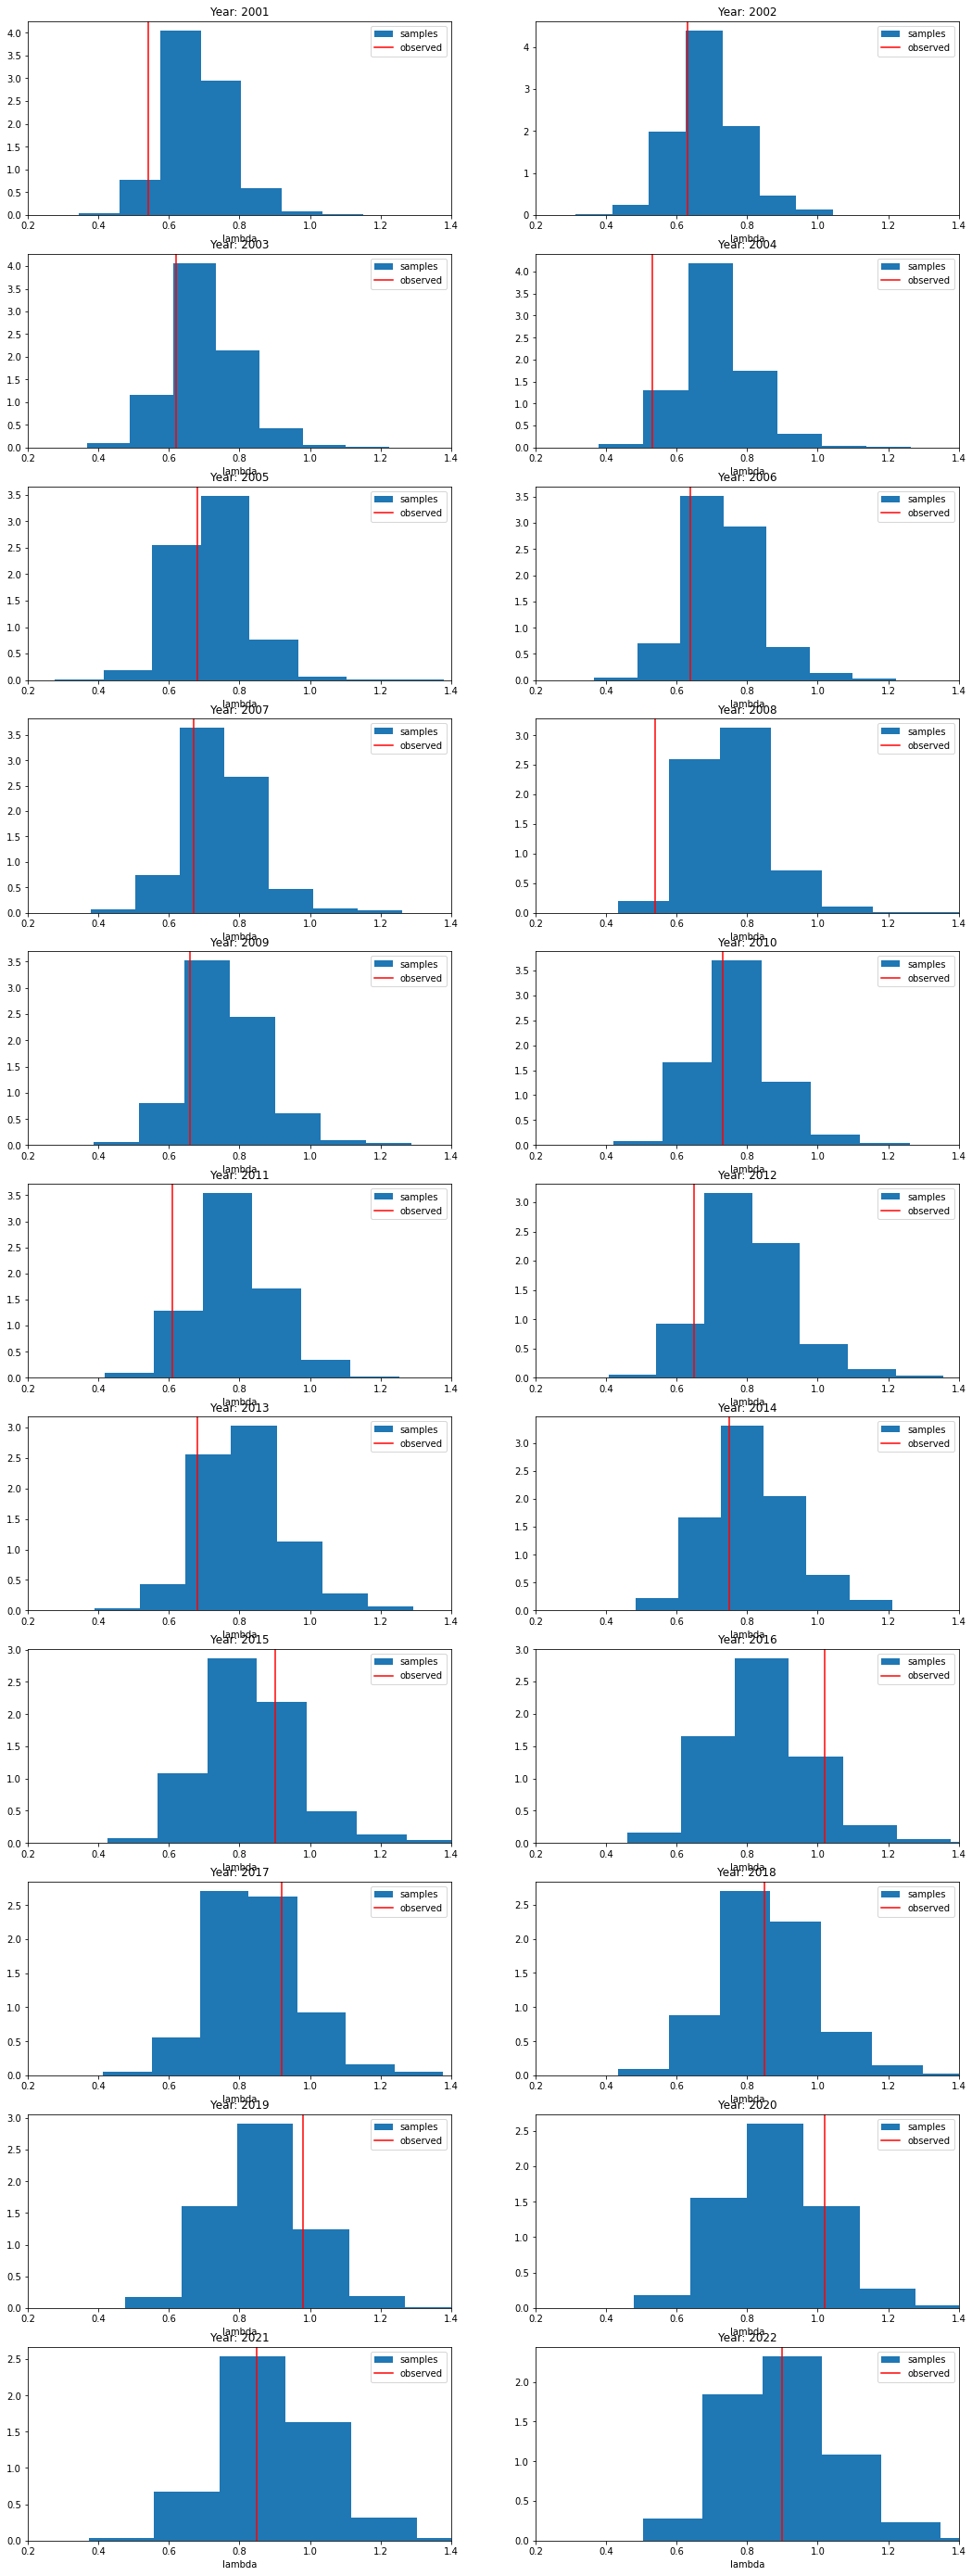

In [500]:
fig, axes = plt.subplots(int(len(df)/2), 2, figsize=(18, 50))
axes = axes.flatten()
df_fit = sim2.draws_pd()
sampled_lambdas = df_fit.loc[:, "temperature[1]":"temperature[22]"]
observed_lambda = df['Temperature'].values
for i, ax in enumerate(axes):
    ax.hist(sampled_lambdas[f'temperature[{i + 1}]'].values, density=True, label='samples')
    ax.axvline(x=observed_lambda[i], color='r', label='observed')
    ax.set_xlabel('lambda')
    ax.set_title(f'Year: {df["year"][i]}')
    ax.set_xlim(0.2, 1.4)
    ax.legend()

Not every year is predicted but as it is just prior it looks good.

## Posterior predictive check

##### Fitting model to data

In [501]:
%%writefile root/stan_files/temp4_ppc.stan

data {
    int<lower=0> N;
    vector[N] temp;
    vector[N] CO2;
}

parameters {
    real<lower=0> alpha;
    real<lower=0> sigma;
    real<lower=0> beta_CO2;
}

transformed parameters {
    vector[N] mean;
    for (i in 1:N) {
        mean[i] = log1p(alpha + beta_CO2 * CO2[i])-0.8;
    }
}

model {
    alpha ~ normal(0.5, 0.1);
    sigma ~ normal(0.1, 0.05);
    beta_CO2 ~ beta(2,2);
    for (i in 1:N) {
        temp[i] ~ lognormal(mean[i], sigma);
    }
}

generated quantities {
    vector[N] temp_;
    vector[N] log_lik;
    for (i in 1:N) {
        temp_[i] = lognormal_rng(mean[i], sigma);
        log_lik[i] = lognormal_lpdf(temp_[i]|mean[i], sigma);
    }
}



Overwriting root/stan_files/temp4_ppc.stan


In [502]:
model_1_fit=CmdStanModel(stan_file='root/stan_files/temp4_ppc.stan')
N = len(df)
data_fit = {'N': N, 'CO2': df.CO2.values[:N], 'temp': df.Temperature.values[:N]}
fit2=model_1_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:compiling stan file /root/stan_files/temp4_ppc.stan to exe file /root/stan_files/temp4_ppc
INFO:cmdstanpy:compiled model executable: /root/stan_files/temp4_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


There were no issues with the sampling

In [503]:
df_ = fit2.draws_pd()
df_.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,sigma,beta_CO2,...,log_lik[13],log_lik[14],log_lik[15],log_lik[16],log_lik[17],log_lik[18],log_lik[19],log_lik[20],log_lik[21],log_lik[22]
0,9.16933,1.000000,0.344161,3.0,9.0,0.0,-6.34210,0.297383,0.111347,0.708740,...,1.53816,1.038810,1.526730,1.05890,1.05177,1.388710,1.316150,1.41795,1.350760,-0.140738
1,8.19906,0.986587,0.344161,3.0,7.0,0.0,-7.55357,0.263257,0.093873,0.855882,...,1.70283,1.195210,1.506650,1.08528,1.60402,0.712578,-0.135537,1.28645,1.284620,1.451060
2,8.56805,0.694044,0.344161,3.0,8.0,1.0,-3.95479,0.359710,0.109979,0.638621,...,0.95820,1.386160,0.785350,1.01531,1.12506,1.443950,1.447850,1.42441,0.874848,-3.152290
3,8.96539,0.878757,0.344161,3.0,7.0,0.0,-7.29745,0.344995,0.112417,0.717680,...,1.35398,0.887301,1.443380,1.09027,1.03719,1.365480,1.396960,1.35874,0.925686,1.272070
4,6.28543,0.753077,0.344161,2.0,3.0,0.0,-5.14464,0.389201,0.104893,0.728552,...,1.04359,0.643090,-0.236922,1.46381,1.47989,1.408400,1.036040,1.37729,0.075234,0.550187


Text(80, 20, 'min')

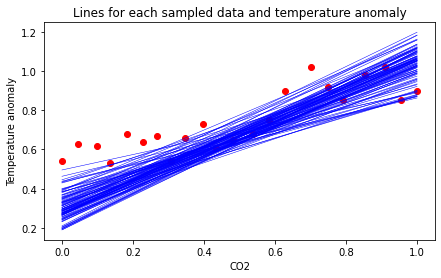

In [504]:
fig, axes = plt.subplots(1,1,figsize=(7,4))

beta_humid = fit2.stan_variable('beta_CO2')
alpha_humid = fit2.stan_variable('alpha')
for i in range(100):
    axes.plot(df['CO2'], alpha_humid[i]+beta_humid[i]*np.array(df['CO2']), linewidth = 0.5, color='b')
plt.title("Lines for each sampled data and temperature anomaly")
axes.scatter(df['CO2'], df['Temperature'], color= 'red')
axes.set_xlabel('CO2')
axes.set_ylabel('Temperature anomaly')
axes.annotate(text='max',xy=(80,320), weight = 'bold', color = 'r', fontsize = 15)
axes.annotate(text='min',xy=(80,20), weight = 'bold', color = 'r', fontsize = 15)

The range is better here but with this distribution there is an issue with lines going a little bit to straight. There are less data points on the center and so there are less wide lines there. As the data is spread at the ends  so are the lines 

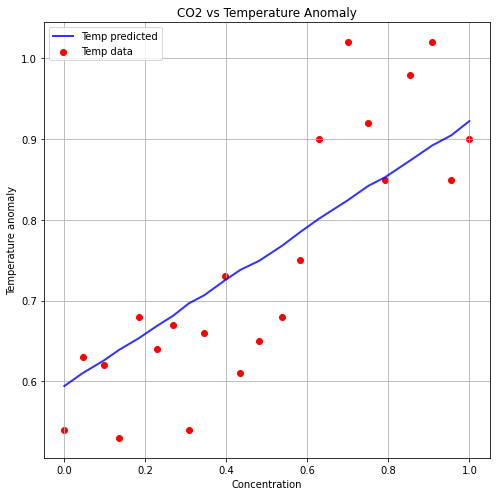

In [509]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

CO2 = np.array(df['CO2'])
CH4 = np.array(df['CH4'])
N2O = np.array(df['N2O'])
Temperature = np.array(df['Temperature'])
mu_CO2 = fit2.stan_variable('mean') 
temp_mean = fit2.stan_variable('temp_') 
column_means = np.mean(temp_mean, axis=0)


mu_CH4 = fit2.stan_variable('mean')
mu_N2O = fit2.stan_variable('mean')

fig, ax = plt.subplots(1, 1, figsize=(7 ,7))


ax.plot(
    CO2,
    column_means,
    color='blue',
    linewidth=2,
    alpha=0.8,
    label='Temp predicted'
)


ax.scatter(CO2, Temperature, color='red', label='Temp data')

ax.set_xlabel('Concentration')
ax.set_ylabel('Temperature anomaly')


ax.legend()
ax.grid()
ax.set_title('CO2 vs Temperature Anomaly')
plt.tight_layout()
plt.show()



As we can see here line that represents mean value of generated data at first glance is less fitted to the data but taking into consideration predicting future values it is good that the line don't go so much up 

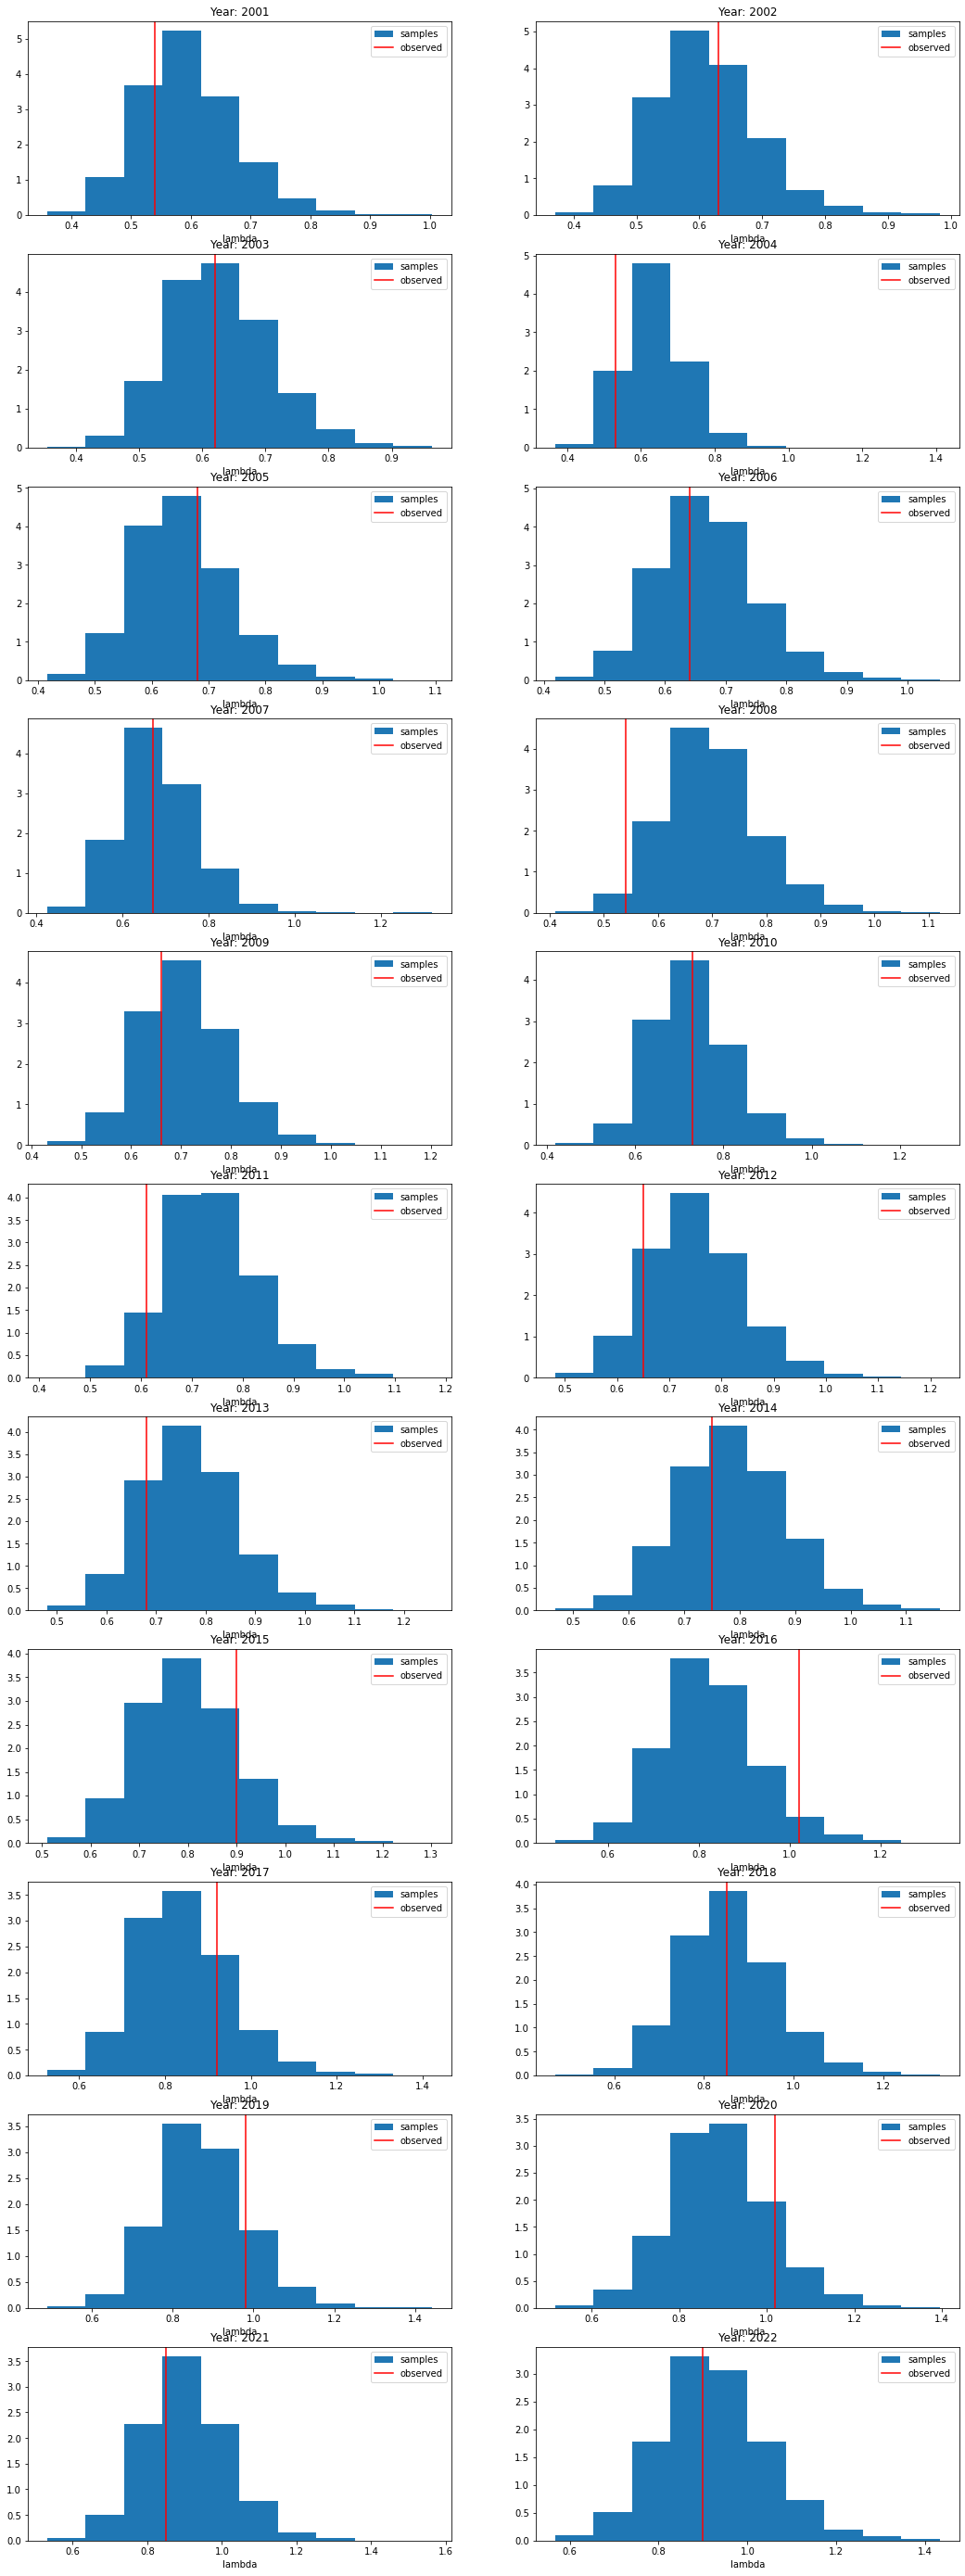

In [506]:
fig, axes = plt.subplots(int(len(df)/2), 2, figsize=(18, 50))
axes = axes.flatten()
df_fit = fit2.draws_pd()
sampled_lambdas = df_fit.loc[:, "temp_[1]":"temp_[22]"]
observed_lambda = df['Temperature'].values
for i, ax in enumerate(axes):
    ax.hist(sampled_lambdas[f'temp_[{i + 1}]'].values, density=True, label='samples')
    ax.axvline(x=observed_lambda[i], color='r', label='observed')
    ax.set_xlabel('lambda')
    ax.set_title(f'Year: {df["year"][i]}')
    ax.legend()

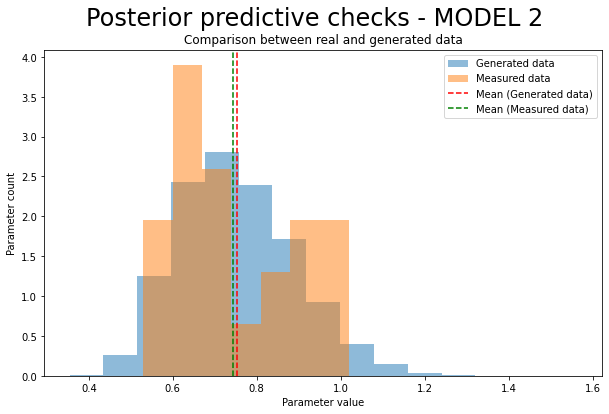

In [508]:
fig2, ax2= plt.subplots(1,1, figsize=(10,6))
fig2.suptitle("Posterior predictive checks - MODEL 2", fontsize=24)

# get measurements
model1_ppc_measurements = fit2.stan_variable('temp_').flatten()  # flatten makes it row/column vector (one of these)

# plot measurements
ax2.hist(model1_ppc_measurements, density=True,bins= 15,  alpha=0.5, label="Generated data")

# compare with real data, density set to True because each data point sampled 999 times
ax2.hist(df["Temperature"], density=True, bins=7, alpha=0.5, label="Measured data")
ax2.set_xlabel("Parameter value")
ax2.set_ylabel("Parameter count")
ax2.set_title("Comparison between real and generated data")
mean_model = np.mean(model1_ppc_measurements)
mean_data = np.mean(df["Temperature"])
ax2.axvline(mean_model, color='r', linestyle='--', label='Mean (Generated data)')
ax2.axvline(mean_data, color='g', linestyle='--', label='Mean (Measured data)')
ax2.legend()
plt.show()

This data is more suitable for our model. As we can see the lines that are representing mean values are really close to each other which is good.

### Marginal Distribution 

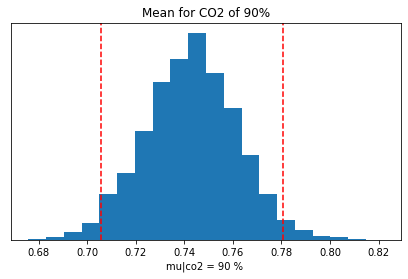

Mean: 0.74
95% confidence interval:  ['0.71', '0.78']


In [351]:
alpha_post =  fit1.stan_variable('alpha')
beta_post = fit1.stan_variable('beta_CO2')
mu_post = fit1.stan_variable('mean')

mu90 = alpha_post+beta_post*(np.mean(df['CO2']))
mu_95p = az.hdi(mu90,.95)
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.hist(mu90,bins=20,density=True)
plt.axvline(mu_95p[0], linestyle = '--', color = 'r')
plt.axvline(mu_95p[1], linestyle = '--', color = 'r')
ax.set_title('Mean for CO2 of 90%')
ax.set_yticks(())
ax.set_xlabel('mu|co2 = 90 % ')
plt.show()
print('Mean: {:4.2f}'.format(np.mean(mu90)))
print('95% confidence interval: ',['{:4.2f}'.format(k) for k in az.hdi(mu90,.95)])

From above histogram we can see that on 90% propability the temperature anomaly will be in range 0.7 and 0.78. The other gases are not gonna be checked due to the similar data with CO2

# Model comparison 

In [352]:
print("Summary - Normal model:")
fit1.summary()

Summary - Normal model:


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,38.000,0.03200,1.300,35.000,38.000,39.00,1500.0,6700.0,1.0
alpha,0.530,0.00089,0.034,0.470,0.530,0.58,1500.0,6400.0,1.0
sigma,0.089,0.00033,0.015,0.068,0.088,0.12,2000.0,8700.0,1.0
beta_CO2,0.450,0.00160,0.059,0.350,0.450,0.54,1400.0,6200.0,1.0
mean[1],0.530,0.00089,0.034,0.470,0.530,0.58,1466.0,6372.0,1.0
...,...,...,...,...,...,...,...,...,...
log_lik[18],0.990,0.01200,0.750,-0.530,1.200,1.70,4019.0,17473.0,1.0
log_lik[19],0.990,0.01200,0.730,-0.480,1.200,1.70,3899.0,16953.0,1.0
log_lik[20],0.990,0.01200,0.730,-0.510,1.200,1.70,3858.0,16774.0,1.0


In [353]:
print("Summary - Lognormal model:")
fit2.summary()

Summary - Lognormal model:


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,7.90,0.03200,1.200,5.500,8.20,9.20,1400.0,4300.0,1.0
alpha,0.31,0.00150,0.058,0.220,0.31,0.41,1400.0,4300.0,1.0
sigma,0.12,0.00044,0.019,0.094,0.12,0.15,1800.0,5400.0,1.0
beta_CO2,0.73,0.00280,0.110,0.530,0.73,0.89,1500.0,4600.0,1.0
mean[1],-0.53,0.00120,0.044,-0.600,-0.53,-0.45,1442.0,4317.0,1.0
...,...,...,...,...,...,...,...,...,...
log_lik[18],0.89,0.01200,0.720,-0.580,1.10,1.50,3553.0,10637.0,1.0
log_lik[19],0.86,0.01200,0.730,-0.560,1.10,1.50,3720.0,11139.0,1.0
log_lik[20],0.82,0.01200,0.730,-0.680,1.10,1.50,3750.0,11229.0,1.0


Values for returned parameters are quite similar. We assumed that in both models that may look alike

In [355]:
fitlognormal_ = az.from_cmdstanpy(posterior=fit2,
                           log_likelihood='log_lik',
                           posterior_predictive='temp_',
                           observed_data={'temperature':df['Temperature']})
fitlognormal_

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> observed_data

In [356]:
fitNormal_ = az.from_cmdstanpy(posterior=fit1,
                           log_likelihood='log_lik',
                           posterior_predictive='temp_',
                           observed_data={'temperature':df['Temperature']})

In [357]:
az.loo(fitlognormal_)

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 4000 by 22 log-likelihood matrix

         Estimate       SE
elpd_loo     6.11     0.84
p_loo       19.74        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        0    0.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)        17   77.3%
   (1, Inf)   (very bad)    5   22.7%

In [361]:
az.waic(fitlognormal_)

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 4000 by 22 log-likelihood matrix

          Estimate       SE
elpd_waic    13.77     0.59
p_waic       12.08        -

There has been a warning during the calculation. Please check the results.

The model with students distribution gives very similar result for WAIC and LOO

In [362]:
az.loo(fitNormal_)

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 4000 by 22 log-likelihood matrix

         Estimate       SE
elpd_loo     8.11     0.54
p_loo       17.78        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        0    0.0%
 (0.5, 0.7]   (ok)          1    4.5%
   (0.7, 1]   (bad)        17   77.3%
   (1, Inf)   (very bad)    4   18.2%

In [363]:
az.waic(fitNormal_)

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 4000 by 22 log-likelihood matrix

          Estimate       SE
elpd_waic    14.29     0.14
p_waic       11.60        -

There has been a warning during the calculation. Please check the results.

 The reason why LOO and WAIC varies here it is because they have different evaluation strategies. WAIC focus on entire dataset while LOO on every point of data. When it comes to LOO it shows that model is not so good but focusing on whole dataset the evaluation is much better.

## LOO

In [364]:
LOO_compare = az.compare({'Lognormal model':fitlognormal_, 'Normal model':fitNormal_}, ic='loo')
LOO_compare

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
Normal model,0,8.110972,17.780012,0.00000,1.0,0.539451,0.00000,True,log
Lognormal model,1,6.110503,19.736623,2.00047,0.0,0.836066,0.88554,True,log


Smaller loo value indicates which model is better. Here we can see that Log-normal model is better from the other one. But lets see the output when it comes to whole dataset -WAIC. 

<AxesSubplot:xlabel='Log'>

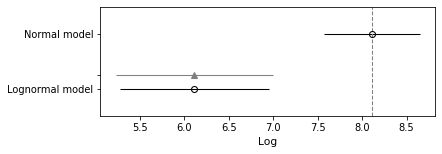

In [369]:
az.plot_compare(LOO_compare, insample_dev=False)

## WAIC

In [366]:
WAIC_compare = az.compare({'Lognormal model':fitlognormal_, 'Gaussian model':fitNormal_}, ic='waic')
WAIC_compare

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
Gaussian model,0,14.287990,11.602994,0.000000,1.0,0.141061,0.000000,True,log
Lognormal model,1,13.765886,12.081239,0.522104,0.0,0.588896,0.564625,True,log


Here also the output says that the Log-normal model is better than the Gaussian Model. 

<AxesSubplot:xlabel='Log'>

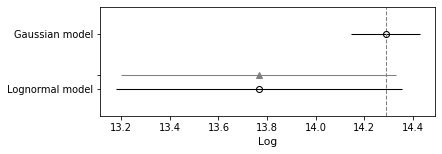

In [370]:
az.plot_compare(WAIC_compare,insample_dev=False)

With WAIC evaluation the difference is comparable  with LOO but the better model is still the same. 

To sum up both models adjusted to the data pretty well. The secound approach turned out to be better than the first one - Gaussian. In the future we could add more parameters to the model or change the impact of the parameters to be different from each other. Also we could consider wider time range than just from 2001 to 2022. 